In [1]:
!pip install tf_nightly

     |████████████████████████████████| 422.2MB 35kB/s 
     |████████████████████████████████| 460kB 49.3MB/s 
     |████████████████████████████████| 3.8MB 29.6MB/s 
     |████████████████████████████████| 81kB 5.9MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.2 which is incompatible.
ERROR: tb-nightly 2.1.0a20191206 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


In [2]:
from __future__ import absolute_import,print_function,division,unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
print(tf.__version__)

2.1.0-dev20191203


In [4]:
imdb=keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
print(len(train_data[0]) , len(train_data[1]))

218 189


In [0]:
word_index=imdb.get_word_index()
word_index={k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3
 

reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

def  decode_rew(text):
  return ' '.join([reverse_word_index.get(i,'?') for i  in text])

In [22]:
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [0]:
train_data= keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256                                                       
                                                       )
test_data= keras.preprocessing.sequence.pad_sequences(test_data,
                                                      padding='post',
                                                      value=word_index["<PAD>"],
                                                      maxlen=256)

In [24]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [0]:
vocab_size=10000

model= keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(32,activation=tf.nn.relu))

model.add(keras.layers.Dense(32,activation=tf.nn.relu))

model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc']

)

In [70]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 161,633
Trainable params: 161,633
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_val=train_data[:10000]
partial_x_train=train_data[10000:]

y_val=train_labels[:10000]
partial_y_train=train_labels[10000:]


In [72]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=10,
                 batch_size=512,
                 validation_data=(x_val,y_val),
                 verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 83us/sample - loss: 0.6920 - acc: 0.5161 - val_loss: 0.6896 - val_acc: 0.5560
Epoch 2/10
15000/15000 [==============================] - 1s 47us/sample - loss: 0.6817 - acc: 0.6415 - val_loss: 0.6697 - val_acc: 0.7416
Epoch 3/10
15000/15000 [==============================] - 1s 45us/sample - loss: 0.6414 - acc: 0.7629 - val_loss: 0.6096 - val_acc: 0.7813
Epoch 4/10
15000/15000 [==============================] - 1s 46us/sample - loss: 0.5506 - acc: 0.8173 - val_loss: 0.5053 - val_acc: 0.8282
Epoch 5/10
15000/15000 [==============================] - 1s 46us/sample - loss: 0.4304 - acc: 0.8628 - val_loss: 0.4034 - val_acc: 0.8529
Epoch 6/10
15000/15000 [==============================] - 1s 46us/sample - loss: 0.3352 - acc: 0.8851 - val_loss: 0.3466 - val_acc: 0.8653
Epoch 7/10
15000/15000 [==============================] - 1s 46us/sample - loss: 0.2759 - acc: 0.9009 - val_loss: 0.

In [73]:
model.evaluate(test_data,test_labels,verbose=2)

25000/25000 - 1s - loss: 0.3059 - acc: 0.8748


[0.3058859536552429, 0.8748]

In [74]:
hist_dec=history.history
hist_dec.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

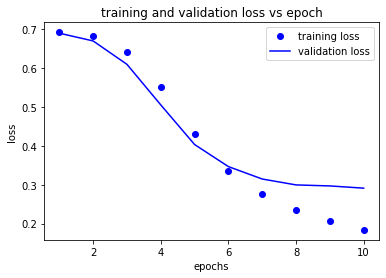

In [75]:
import matplotlib.pyplot as plt

val_loss= hist_dec['val_loss']
val_acc= hist_dec['val_acc']
loss= hist_dec['loss']
acc= hist_dec['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('training and validation loss vs epoch')
plt.legend()
plt.show()